In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the csv file
df = pd.read_csv('data/action_labels.csv')
df.head()

# Define a mapping for the names
unique_persons = df['person'].unique()
name_mapping = {
    **{name: name for i, name in enumerate(unique_persons)}
    # Add more mappings here as needed
}
name_mapping['Anton'] = 'Anton Mihalkevich'

# Apply the mapping to the 'person' column
df['person'] = df['person'].map(name_mapping)
df = df.fillna('')

In [17]:
# Now create a mapping from names to IDs
unique_persons = df['person'].unique()
id_mapping = {name: f'Person {i+1}' for i, name in enumerate(unique_persons)}

# Apply the mapping to the 'person' column
df['person'] = df['person'].map(id_mapping)

In [18]:
# Split the actions, transitions, state, location columns
df['actions'] = df['actions'].str.split(' ')
df['transitions'] = df['transitions'].str.split(' ')
df['state'] = df['state'].str.split(' ')
df['location'] = df['location'].str.split(' ')

In [19]:
df.head()

,source,person,shot,frame,actions,transitions,state,location
0,20.csv,Person 1,20,000185_0000030580.png,[],[],[sit],[in_room]
1,20.csv,Person 1,20,000186_0000030877.png,[],[],[sit],[in_room]
2,20.csv,Person 1,20,000187_0000031060.png,[],[],[sit],[in_room]
3,20.csv,Person 1,20,000188_0000031149.png,[],[],[sit],[in_room]
4,20.csv,Person 1,20,000189_0000031239.png,[],[],[sit],[in_room]


8 8


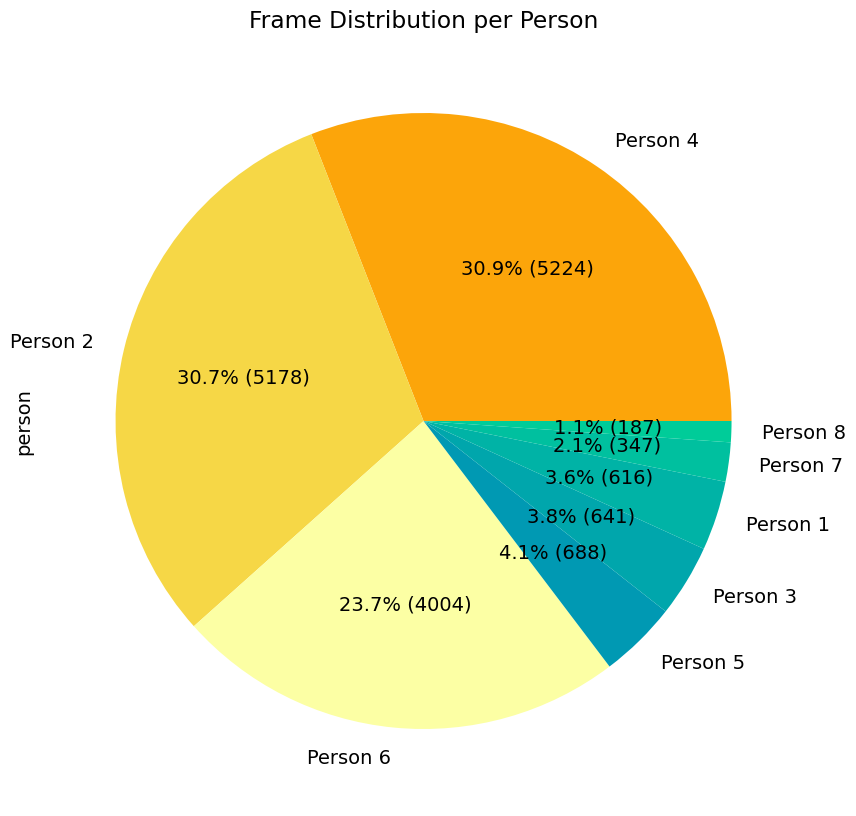

In [20]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Get value counts
counts = df['person'].value_counts()

# Sort unique persons according to their count
sorted_persons = counts.index

N = len(sorted_persons)

# Inferno color map
inferno_colors = cm.inferno(np.linspace(0.8, 1, 3))
winter_colors = cm.winter(np.linspace(0.6, 0.8, 5))
colors = np.concatenate((inferno_colors, winter_colors), axis=0)
print(len(colors), N)
color_map = dict(zip(sorted_persons, colors))

# Custom autopct function to display absolute count
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

# Plot pie chart with inferno color map and absolute counts
fig, ax = plt.subplots(figsize=(10,10))
counts.plot(kind='pie', autopct=make_autopct(counts.values), colors=[color_map[i] for i in counts.index], ax=ax)
ax.set_title('Frame Distribution per Person')
plt.savefig('figures/person-distribution-inferno.pdf')
plt.show()


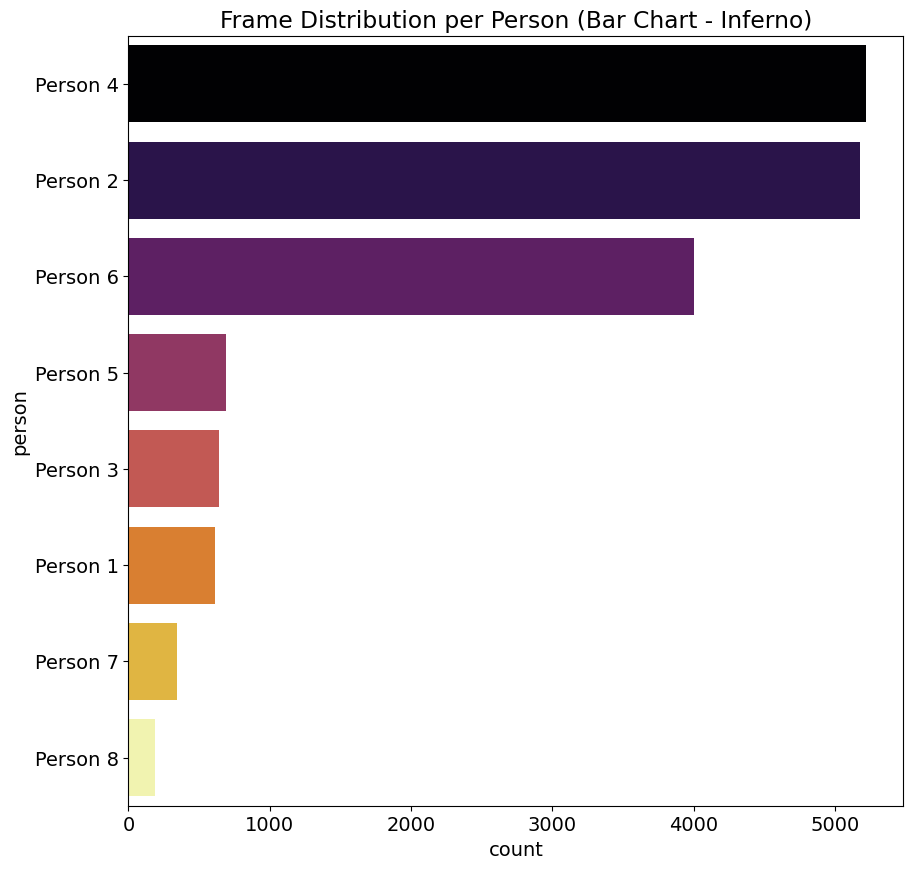

In [21]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Get value counts
counts = df['person'].value_counts()

# Sort unique persons according to their count
sorted_persons = counts.index

N = len(sorted_persons)

# Inferno color map
inferno_colors = cm.inferno(np.linspace(0, 1, N))
inferno_map = dict(zip(sorted_persons, inferno_colors))

# Plot bar chart with inferno color map
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data=df, y='person', order=counts.index, palette=inferno_map, ax=ax)
ax.set_title('Frame Distribution per Person (Bar Chart - Inferno)')
plt.savefig('figures/person-distribution-inferno-bar.pdf')
plt.show()


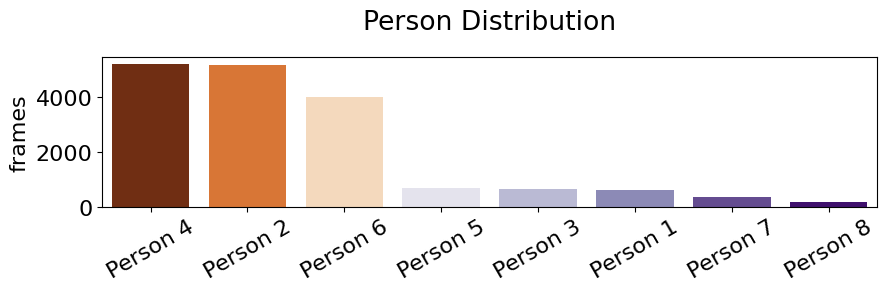

In [22]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the default font size
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='DejaVu Sans', size=16)

# Get value counts
counts = df['person'].value_counts()

# Sort unique persons according to their count
sorted_persons = counts.index

N = len(sorted_persons)

# Inferno color map
inferno_colors = cm.Oranges(np.linspace(1, 0.2, 3))
winter_colors = cm.Purples(np.linspace(0.2, 1, 5))

# Ensure that number of colors is equal to the number of unique persons
assert len(inferno_colors) + len(winter_colors) >= N

# Concatenate inferno and winter colors
colors = np.concatenate((inferno_colors, winter_colors), axis=0)

# Assign colors to persons
color_map = dict(zip(sorted_persons, colors))

# Plot bar chart with inferno color map
fig, ax = plt.subplots(figsize=(10,2))
sns.countplot(data=df, x='person', order=counts.index, palette=color_map, ax=ax)
ax.set_title('Person Distribution', pad=20)

# Rotate labels by 30 degrees
plt.xticks(rotation=30)


# Remove x-label
ax.set_xlabel('')
ax.set_ylabel('frames')

# Adjust the margins of the plot and save the figure
plt.subplots_adjust(bottom=0.15, top=0.90)
plt.savefig('figures/person-distribution-bar.pdf', bbox_inches='tight')
plt.show()

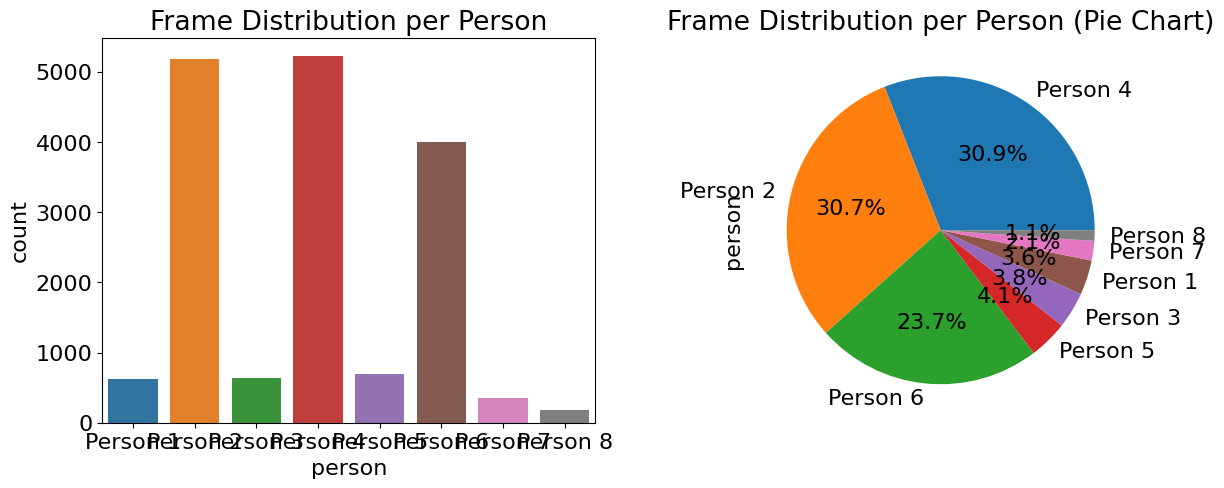

In [23]:
# Frame Distribution per Person (Bar Plot and Pie Chart)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(data=df, x='person', ax=ax[0])
ax[0].set_title('Frame Distribution per Person')
df['person'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Frame Distribution per Person (Pie Chart)')
plt.savefig('figures/person-distribution.pdf')
plt.show()

In [24]:
# Expand the dataframe rows based on the split values in 'actions', 'transitions', 'state', 'location' columns
df_actions = df.explode('actions')
print(df_actions['actions'].unique())
df_transitions = df.explode('transitions')
print(df_transitions['transitions'].unique())
df_state = df.explode('state')
print(df_state['state'].unique())
df_location = df.explode('location')
print(df_location['location'].unique())

['' 'wave' 'pick_up' 'drink' 'put_down' 'type']
['' 'get_up' 'get_down']
['sit' '' 'stand' 'walk' 'lay']
['in_room' 'out_of_room' 'out_of_view']


In [25]:
df_actions = df.explode('actions')
df_actions = df_actions[df_actions['actions'] != '']
# df_actions.loc[df_actions['actions'] == '', 'actions'] = 'no action'

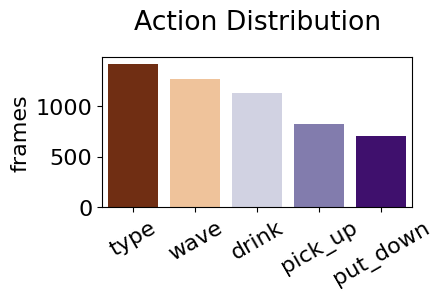

In [26]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the default font size
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='DejaVu Sans', size=16)

# Explode the 'actions' column
df_exploded = df.explode('actions')

# Replace empty actions with 'no action'
df_exploded = df_exploded[df_exploded['actions'] != ''] 

# Get value counts
counts = df_exploded['actions'].value_counts()

# Sort unique actions according to their count
sorted_actions = counts.index

N = len(sorted_actions)

# Inferno color map
inferno_colors = cm.Oranges(np.linspace(1, 0.3, N//2))
winter_colors = cm.Purples(np.linspace(0.3, 1, N - N//2))

# Ensure that number of colors is equal to the number of unique actions
assert len(inferno_colors) + len(winter_colors) >= N

# Concatenate inferno and winter colors
colors = np.concatenate((inferno_colors, winter_colors), axis=0)

# Assign colors to actions
color_map = dict(zip(sorted_actions, colors))

# Plot bar chart with mixed color map
fig, ax = plt.subplots(figsize=(4,2))
sns.countplot(data=df_exploded, x='actions', order=counts.index, palette=color_map, ax=ax)
ax.set_title('Action Distribution', pad=20)

# Rotate labels by 30 degrees
plt.xticks(rotation=30)

# Remove x-label
ax.set_xlabel('')
ax.set_ylabel('frames')

# Adjust the margins of the plot and save the figure
plt.subplots_adjust(bottom=0.15, top=0.90)
plt.savefig('figures/action-distribution-bar.pdf', bbox_inches='tight')
plt.show()


In [27]:
df_transitions = df_transitions[df_transitions['transitions']!='']
df_transitions.head()

,source,person,shot,frame,actions,transitions,state,location
55,20.csv,Person 1,20,000240_0000036863.png,[],get_up,[],[in_room]
56,20.csv,Person 1,20,000241_0000036959.png,[],get_up,[],[in_room]
57,20.csv,Person 1,20,000242_0000037087.png,[],get_up,[],[in_room]
58,20.csv,Person 1,20,000243_0000037215.png,[],get_up,[],[in_room]
59,20.csv,Person 1,20,000244_0000037311.png,[],get_up,[],[in_room]


In [28]:
df_state = df_state[df_state['state']!='']
df_state.head()

,source,person,shot,frame,actions,transitions,state,location
0,20.csv,Person 1,20,000185_0000030580.png,[],[],sit,[in_room]
1,20.csv,Person 1,20,000186_0000030877.png,[],[],sit,[in_room]
2,20.csv,Person 1,20,000187_0000031060.png,[],[],sit,[in_room]
3,20.csv,Person 1,20,000188_0000031149.png,[],[],sit,[in_room]
4,20.csv,Person 1,20,000189_0000031239.png,[],[],sit,[in_room]


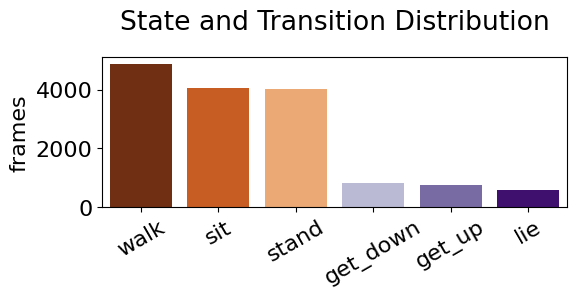

In [29]:
combined_series = pd.concat([df_state['state'], df_transitions['transitions']])

# Convert series to dataframe
df_combined_series = combined_series.reset_index().rename(columns={0: 'combined'})
df_combined_series['combined'] = df_combined_series['combined'].replace('lay', 'lie')

# Get value counts
counts = df_combined_series['combined'].value_counts()

# Sort unique states/transitions according to their count
sorted_combined = counts.index

N = len(sorted_combined)

# Inferno color map
inferno_colors = cm.Oranges(np.linspace(1, 0.4, N//2))
winter_colors = cm.Purples(np.linspace(0.4, 1, N - N//2))

# Ensure that number of colors is equal to the number of unique states/transitions
assert len(inferno_colors) + len(winter_colors) >= N

# Concatenate inferno and winter colors
colors = np.concatenate((inferno_colors, winter_colors), axis=0)

# Assign colors to states/transitions
color_map = dict(zip(sorted_combined, colors))

# Plot bar chart with mixed color map
fig, ax = plt.subplots(figsize=(6,2))
sns.countplot(data=df_combined_series, x='combined', order=counts.index, palette=color_map, ax=ax)
ax.set_title('State and Transition Distribution', pad=20)

# Rotate labels by 30 degrees
plt.xticks(rotation=30)

# Remove x-label
ax.set_xlabel('')
ax.set_ylabel('frames')

# Adjust the margins of the plot and save the figure
plt.subplots_adjust(bottom=0.15, top=0.90)
plt.savefig('figures/state-transition-distribution-bar.pdf', bbox_inches='tight')
plt.show()

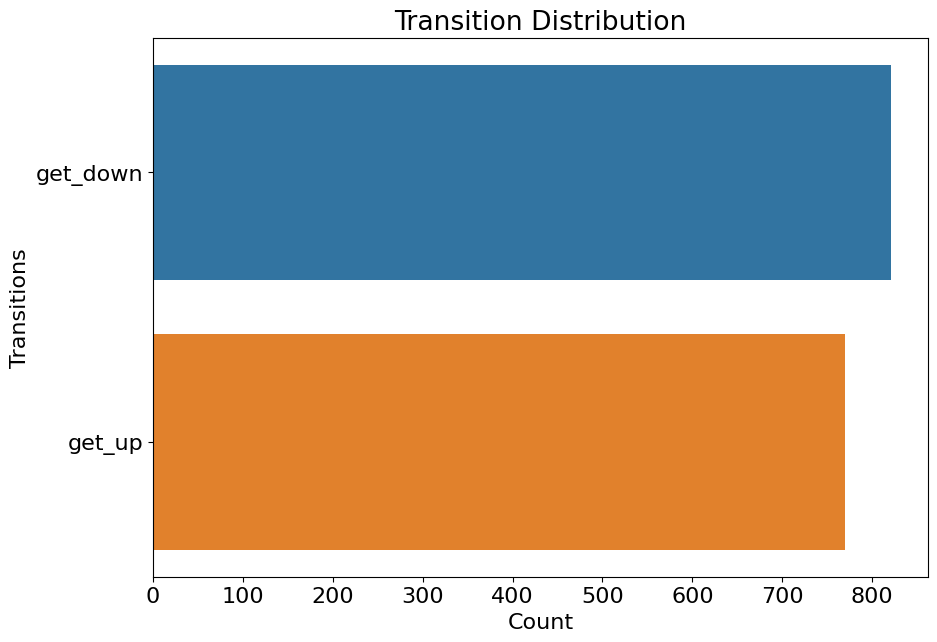

In [30]:
# Transition Distribution (Bar Plot)
plt.figure(figsize=(10,7))
sns.countplot(data=df_transitions, y='transitions', order=df_transitions['transitions'].value_counts().index)
plt.title('Transition Distribution')
plt.xlabel('Count')
plt.ylabel('Transitions')
plt.show()

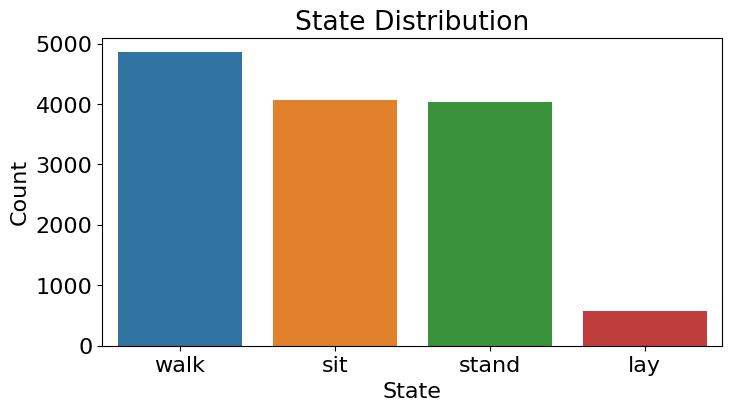

In [31]:
# State Distribution (Bar Plot)
plt.figure(figsize=(8,4))
df_state_filter = df_state[df_state['state']!='']
sns.countplot(data=df_state_filter, x='state', order=df_state_filter['state'].value_counts().index)
plt.title('State Distribution')
plt.ylabel('Count')
plt.xlabel('State')
plt.savefig('state-distribution.pdf')

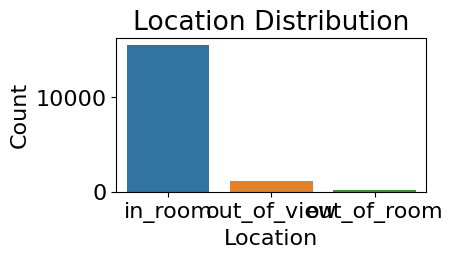

In [32]:
# Location Distribution (Bar Plot)
plt.figure(figsize=(4,2))
sns.countplot(data=df_location, x='location', order=df_location['location'].value_counts().index)
plt.title('Location Distribution')
plt.ylabel('Count')
plt.xlabel('Location')
plt.savefig('figures/location-distribution.pdf')

In [33]:
actions_df = pd.concat([df_actions, df_transitions, df_state])
actions_df = actions_df[(actions_df['actions'] != '') & (actions_df['actions'].isin(['walk', 'sit', 'stand', 'lay', 'get_down', 'get_up', 'type', 'wave', 'drink', 'pick_up', 'put_down']))]
actions_df

,source,person,shot,frame,actions,transitions,state,location
25,20.csv,Person 1,20,000210_0000033439.png,wave,[],[sit],[in_room]
26,20.csv,Person 1,20,000211_0000033567.png,wave,[],[sit],[in_room]
27,20.csv,Person 1,20,000212_0000033663.png,wave,[],[sit],[in_room]
28,20.csv,Person 1,20,000213_0000033791.png,wave,[],[sit],[in_room]
29,20.csv,Person 1,20,000214_0000033887.png,wave,[],[sit],[in_room]
...,...,...,...,...,...,...,...,...
16550,127.csv,Person 4,127,000740_0000101278.png,wave,[],[stand],[in_room]
16551,127.csv,Person 4,127,000741_0000101406.png,wave,[],[stand],[in_room]
16552,127.csv,Person 4,127,000742_0000101534.png,wave,[],[stand],[in_room]
16553,127.csv,Person 4,127,000743_0000101631.png,wave,[],[stand],[in_room]


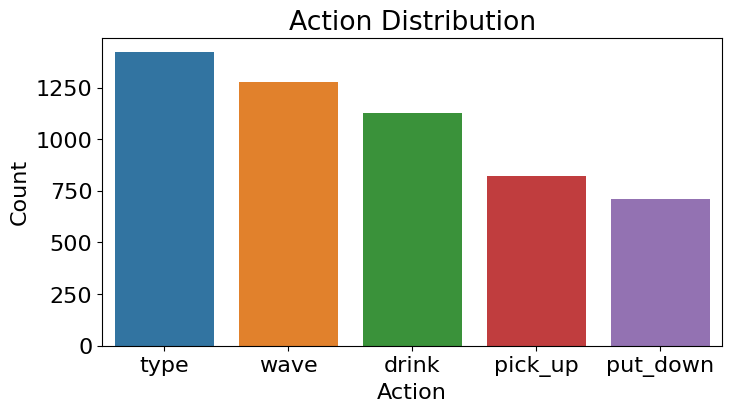

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


actions_df = pd.concat([df_actions, df_transitions, df_state])

actions_df = actions_df[(actions_df['actions'] != '') & (actions_df['actions'].isin(['walk', 'sit', 'stand', 'lay', 'get_down', 'get_up', 'type', 'wave', 'drink', 'pick_up', 'put_down']))]

action_counts = actions_df['actions'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(x=action_counts.index, y=action_counts.values)
plt.ylabel('Count')
plt.xlabel('Action')
plt.title('Action Distribution')
plt.savefig('figures/action-distribution.pdf')

In [35]:
action_counts

type        1420
wave        1276
drink       1129
pick_up      821
put_down     710
Name: actions, dtype: int64

In [36]:
df_state['state'].value_counts()

walk     4855
sit      4065
stand    4036
lay       578
Name: state, dtype: int64

In [37]:
df_transitions['transitions'].value_counts()

get_down    821
get_up      770
Name: transitions, dtype: int64

In [38]:
df_location['location'].value_counts()

in_room        15488
out_of_view     1163
out_of_room      234
Name: location, dtype: int64